## Finding all the combinations of file 

In [1]:
for i in ["03"]:
    for j in ["01"]:
        for k in ["03","04"]:
            for l in ["01","02"]:
                for m in ["01","02"]:
                    for n in ["01","02"]:
                        print("'{}-{}-{}-{}-{}-{}',".format(i,j,k,l,m,n))

'03-01-03-01-01-01',
'03-01-03-01-01-02',
'03-01-03-01-02-01',
'03-01-03-01-02-02',
'03-01-03-02-01-01',
'03-01-03-02-01-02',
'03-01-03-02-02-01',
'03-01-03-02-02-02',
'03-01-04-01-01-01',
'03-01-04-01-01-02',
'03-01-04-01-02-01',
'03-01-04-01-02-02',
'03-01-04-02-01-01',
'03-01-04-02-01-02',
'03-01-04-02-02-01',
'03-01-04-02-02-02',


## Making Directories to place Happy and Sad Audios in different folders

In [2]:
import os
os.makedirs("/kaggle/working/Happy")
os.makedirs("/kaggle/working/Sad")

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import shutil

name = ('03-01-03-01-01-01',
        '03-01-03-01-01-02',
        '03-01-03-01-02-01',
        '03-01-03-01-02-02',
        '03-01-03-02-01-01',
        '03-01-03-02-01-02',
        '03-01-03-02-02-01',
        '03-01-03-02-02-02',
        '03-01-04-01-01-01',
        '03-01-04-01-01-02',
        '03-01-04-01-02-01',
        '03-01-04-01-02-02',
        '03-01-04-02-01-01',
        '03-01-04-02-01-02',
        '03-01-04-02-02-01',
        '03-01-04-02-02-02')

i = 1
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        if filename.startswith(name):
            i = i+1
            if filename.startswith(("03-01-03")):
                shutil.copy(os.path.join(dirname, filename),"./Happy/")
            else:
                shutil.copy(os.path.join(dirname, filename),"./Sad/")
            
print("Count = ",i)
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Count =  769


In [4]:
import librosa
import librosa.display
from sklearn.preprocessing import minmax_scale
import IPython.display as ipd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [5]:
ipd.Audio('./Happy/03-01-03-02-02-02-10.wav')

In [6]:
ipd.Audio('./Sad/03-01-04-02-02-01-06.wav')

# Task 1
Select 3 or 4 audio files of happy and sad, generate following plots and explain the
inferences in 1-2 lines,
1.  Waveform
3. Spectrogram on log
4. Zero Crossing rates
5. Spectral Centroids
6. Spectral Bandwidth
7. MFCC

In [7]:
## Happy files
H_file_1 = "./Happy/03-01-03-02-02-02-10.wav"
H_file_2 = "./Happy/03-01-03-01-02-01-05.wav"
H_file_3 = "./Happy/03-01-03-01-01-01-09.wav"

In [8]:
## Sad files
S_file_1 = "./Sad/03-01-04-02-02-01-06.wav"
S_file_2 = "./Sad/03-01-04-01-02-02-15.wav"
S_file_3 = "./Sad/03-01-04-01-02-02-15.wav"

## Wave form


In [9]:
def waveform(file):
    x , sr = librosa.load(file)
    plt.figure(figsize=(20, 5))
    plt.title('Waveplot of audio {}'.format(file))
    librosa.display.waveshow(x, sr=sr)
    plt.show()

In [10]:
Happy = [H_file_1,H_file_2,H_file_3]
Sad = [S_file_1,S_file_2,S_file_3]

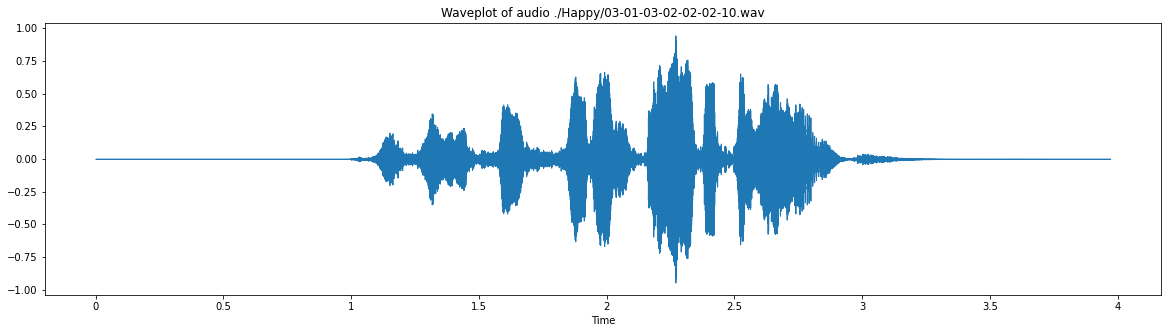

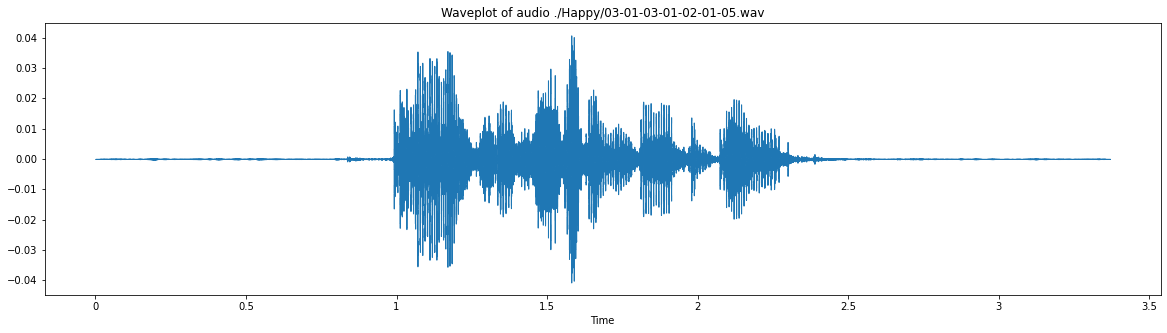

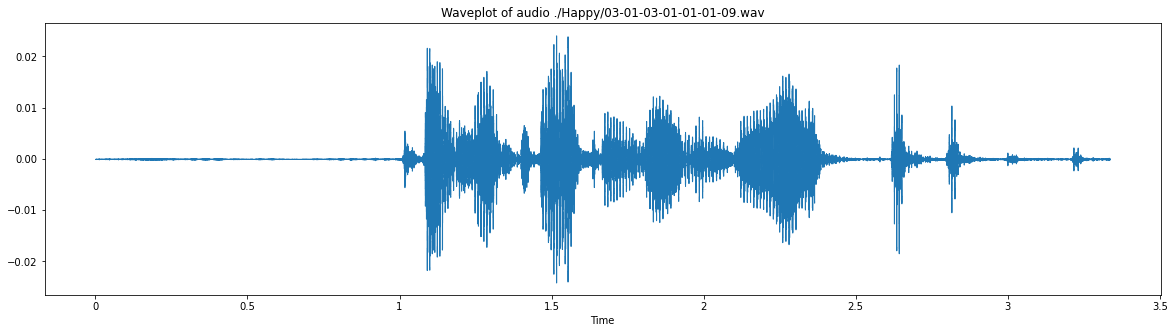

In [11]:
for file in Happy:
    waveform(file)

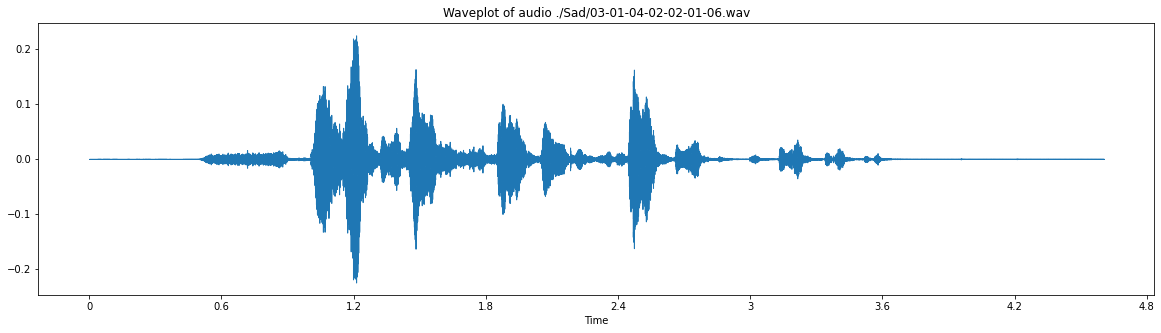

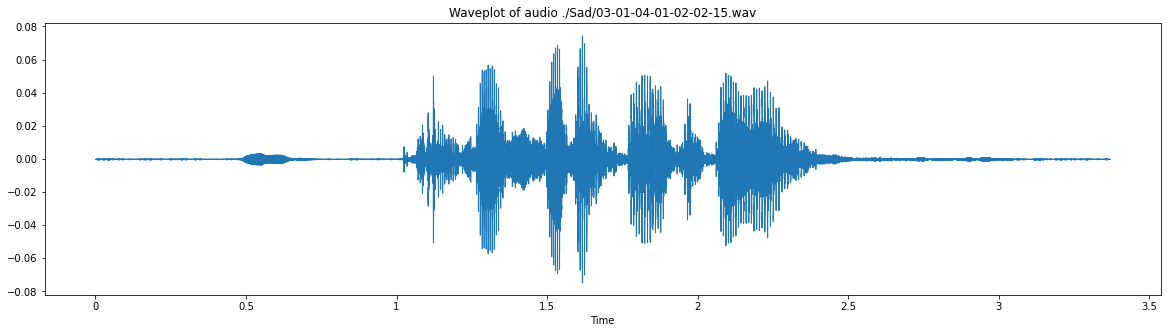

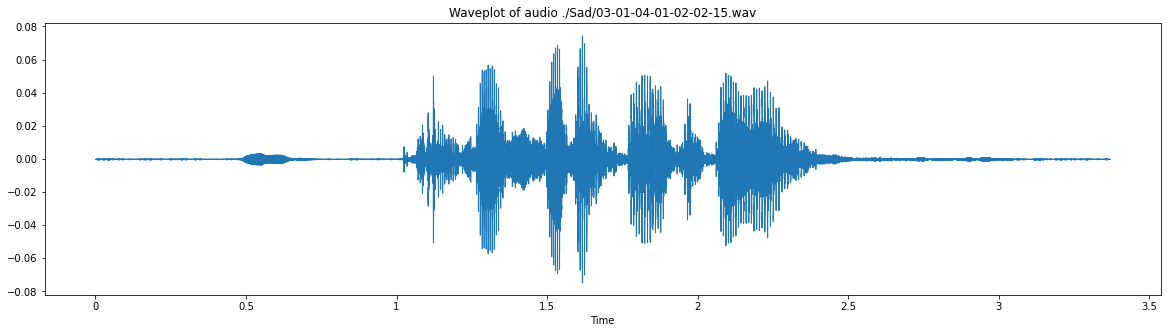

In [12]:
for file in Sad:
    waveform(file)

## Spectogram on log

In [13]:
def Spectogram_of_log(file):
    x, sr = librosa.load(file)
    
    plt.figure(figsize=(20, 5))
    plt.title('Specshow of audio {}'.format(file))
    X = librosa.stft(x)
    
    Xdb = librosa.amplitude_to_db(abs(X))
    librosa.display.specshow(Xdb,sr = sr, x_axis="time",y_axis = "log")
    plt.show()
    

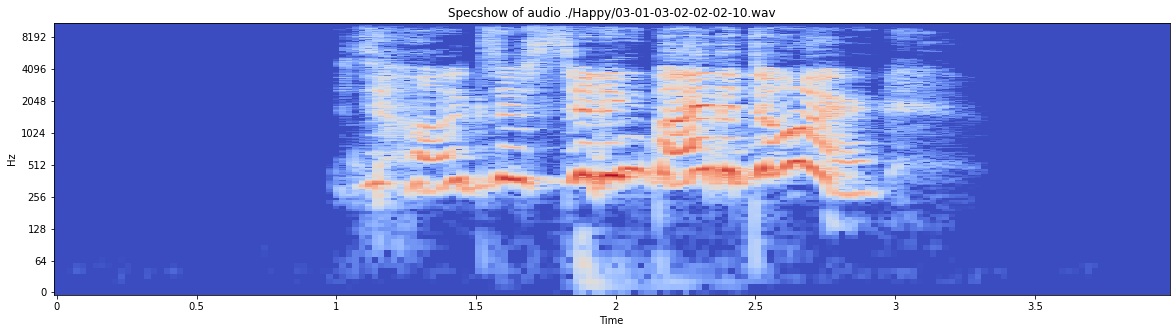

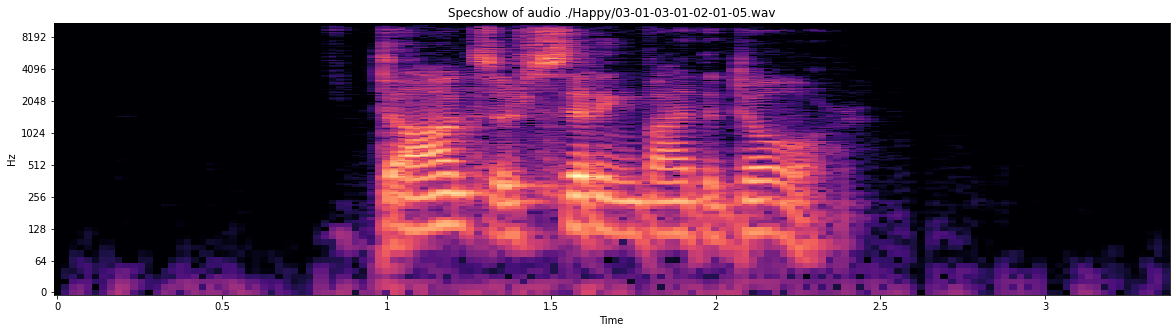

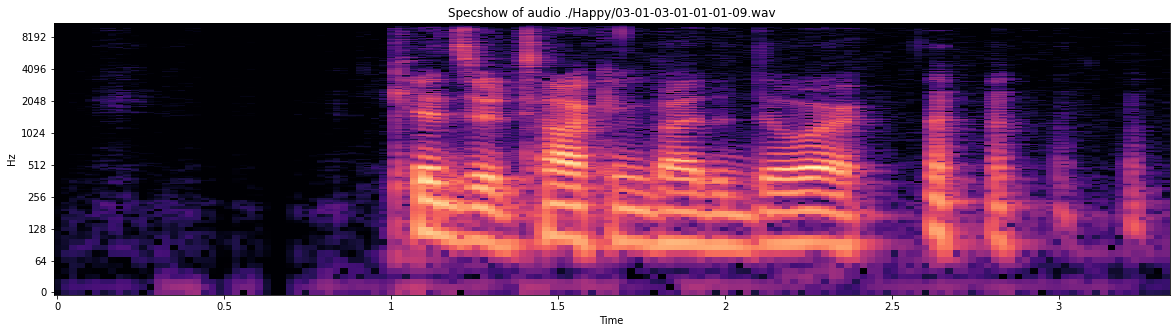

In [14]:
for file in Happy:
    Spectogram_of_log(file)

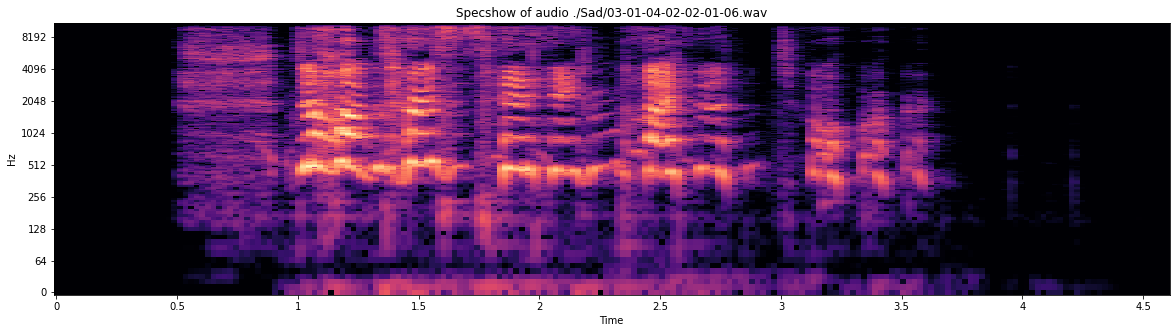

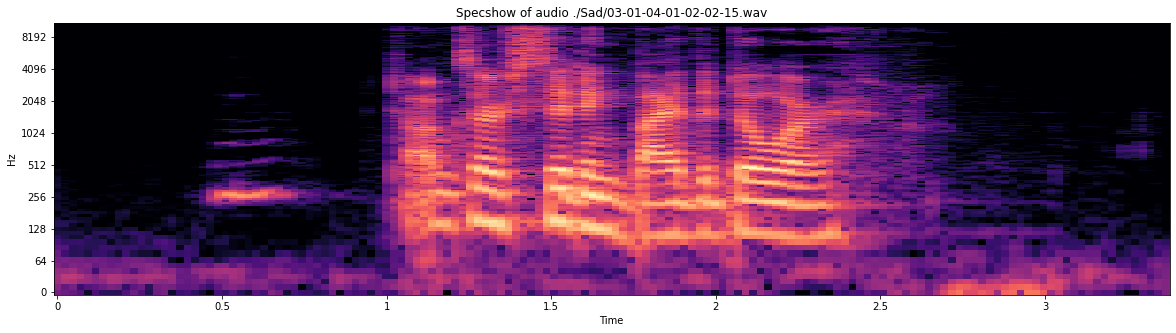

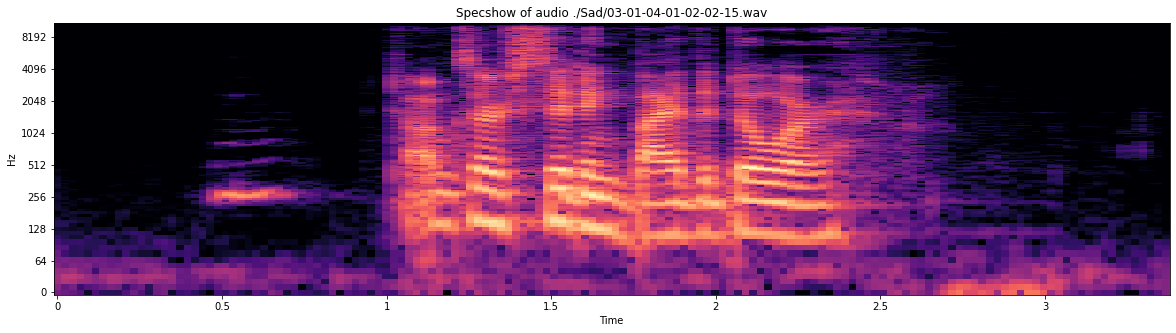

In [15]:
for file in Sad:
    Spectogram_of_log(file)

**Audio files show high pitch  which can be seen by redness in data plot**

## Zero Crossing Rate

In [16]:
def Zero_crossing_rate(file):
    x, sr = librosa.load(file)
    
    zero_crossings = librosa.zero_crossings(x)
    print("Sum of zero crossing ", zero_crossings.sum())
    plt.figure(figsize=(20, 5))
    plt.title('Zero Crossing Rate of audio {}'.format(file))
    zcrs = librosa.feature.zero_crossing_rate(x)
    plt.plot(zcrs[0])
    plt.show()

Sum of zero crossing  15418


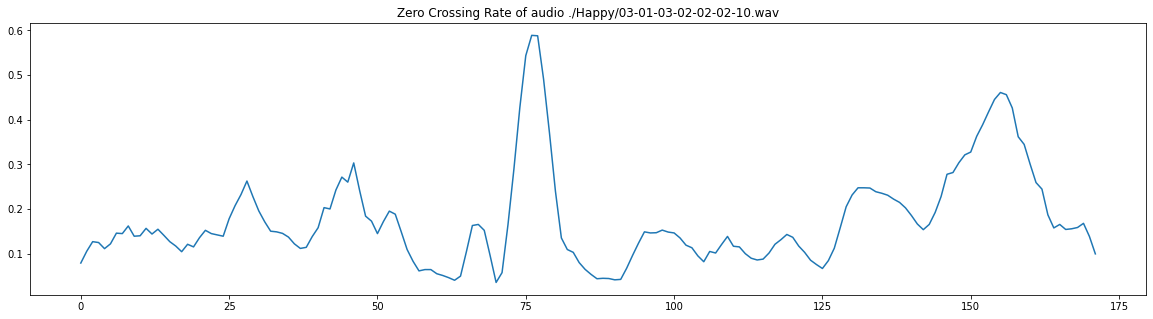

Sum of zero crossing  17119


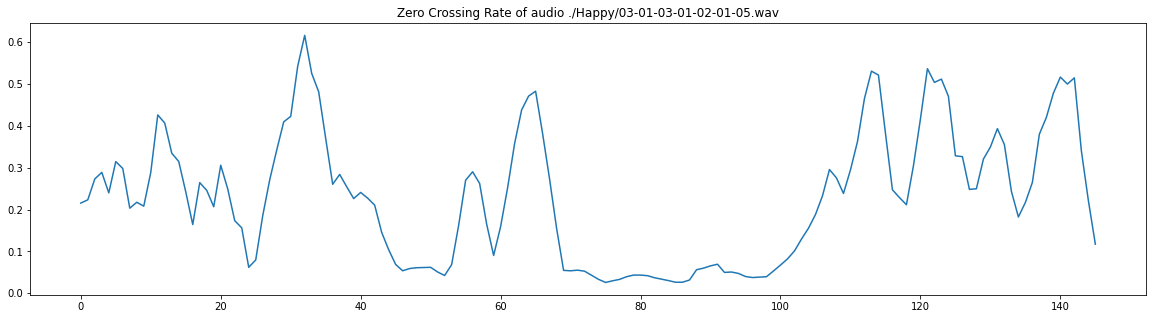

Sum of zero crossing  16882


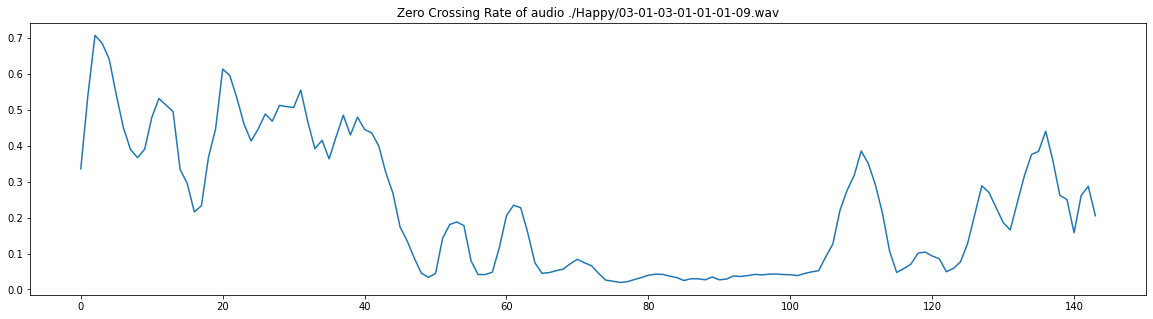

In [17]:
for file in Happy:
    Zero_crossing_rate(file)

Sum of zero crossing  30133


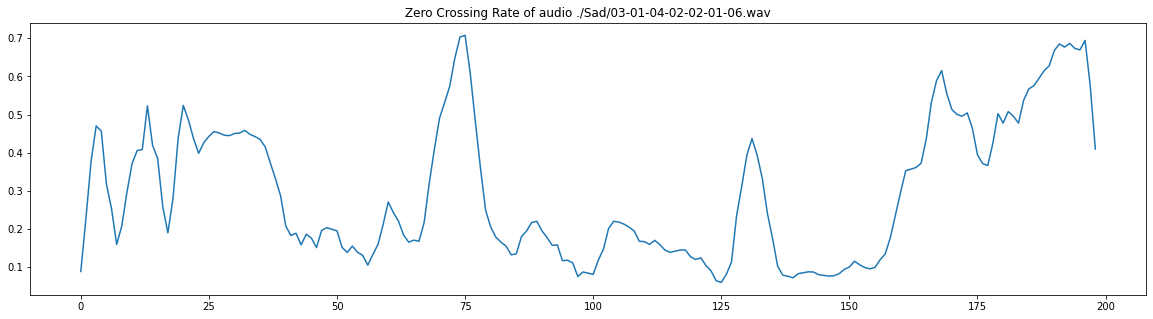

Sum of zero crossing  9231


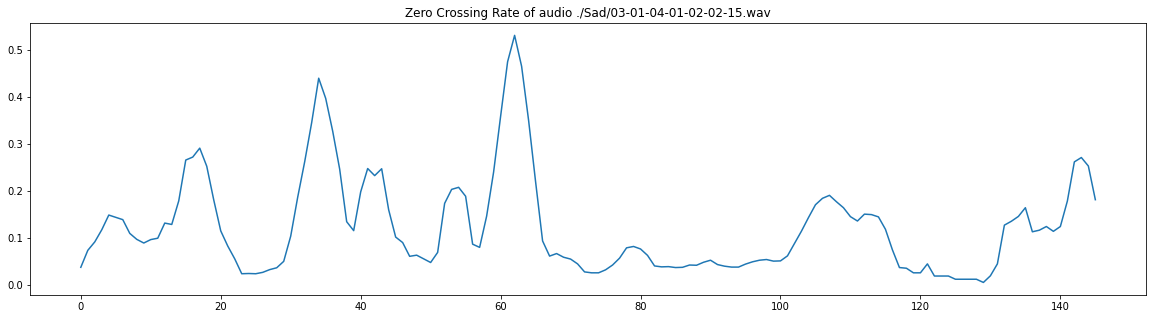

Sum of zero crossing  9231


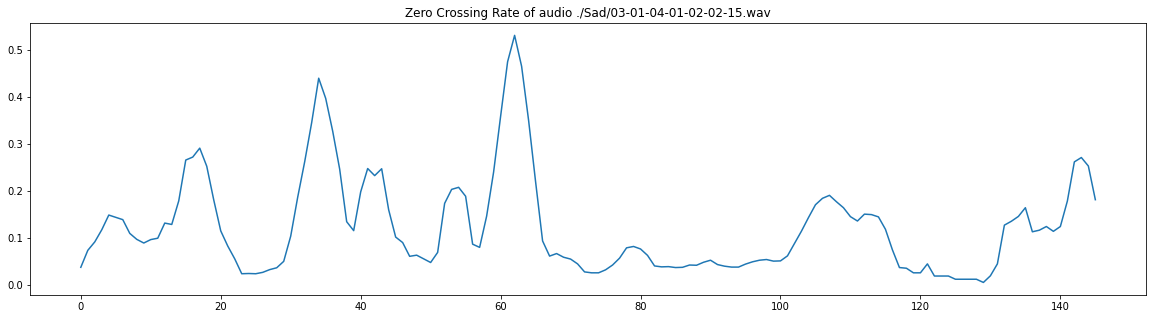

In [18]:
for file in Sad:
    Zero_crossing_rate(file)

## Spectral Centroid

In [19]:
from sklearn.preprocessing import minmax_scale
def normalize(x, axis=0):
    return minmax_scale(x, axis=axis)

In [20]:
def Spectral_centroid(file):
    x, sr = librosa.load(file)
    plt.figure(figsize=(20, 5))
    plt.title('Spectral Centroids of audio {}'.format(file))
    spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
    frames = range(len(spectral_centroids))
    t = librosa.frames_to_time(frames)
    librosa.display.waveshow(x, sr=sr, alpha=0.4)
    plt.plot(t, normalize(spectral_centroids), color='r')
    plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Pass y=[-9.5055666e-06 -3.0879924e-05 -6.5940058e-06 ...  1.4301932e-05
  2.0139956e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  """


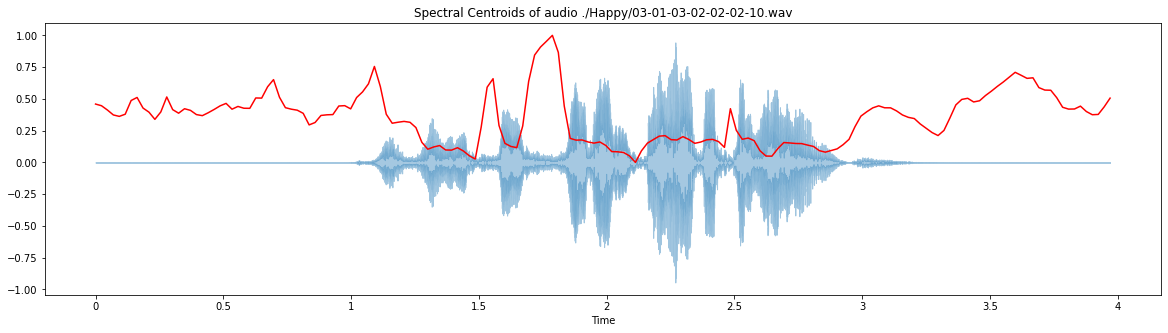

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  """


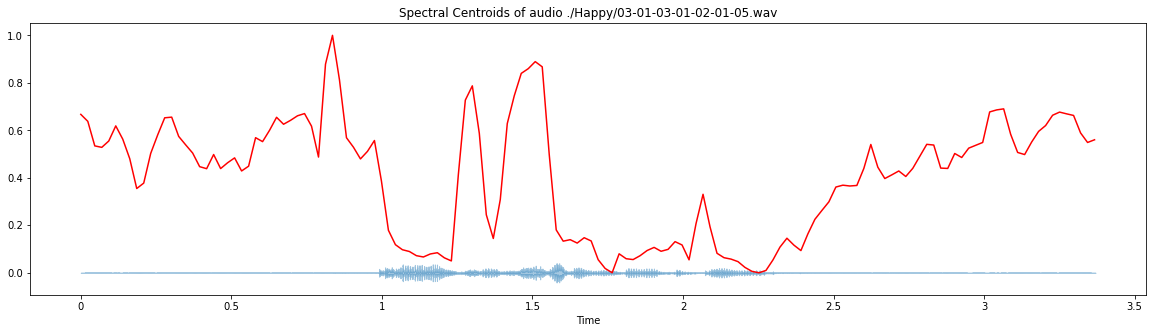

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Pass y=[-1.3235668e-06  2.2518198e-06 -1.0626446e-05 ... -2.5542351e-05
 -1.3824980e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  """


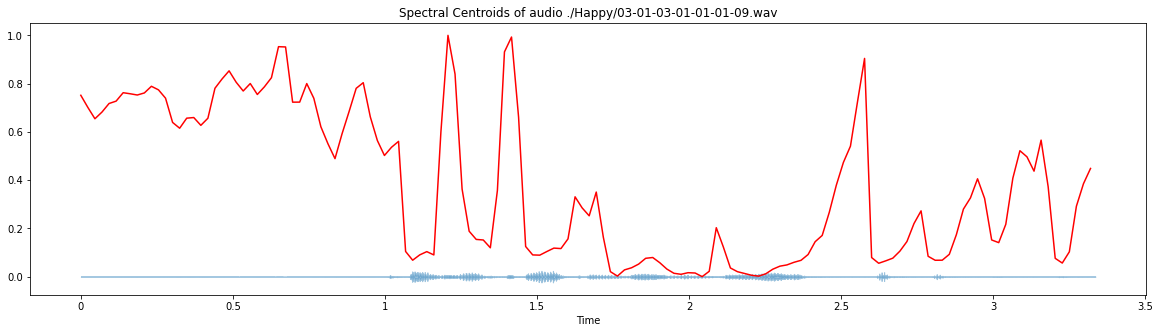

In [21]:
for file in Happy:
    Spectral_centroid(file)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.0808695e-07
  3.4365976e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  """


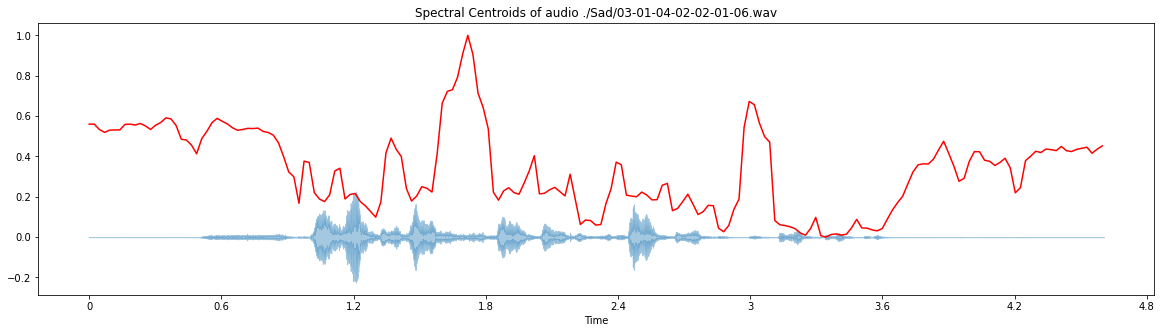

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Pass y=[ 8.6909458e-05  1.1727664e-04  1.1829916e-04 ... -5.4093937e-07
  4.6204173e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  """


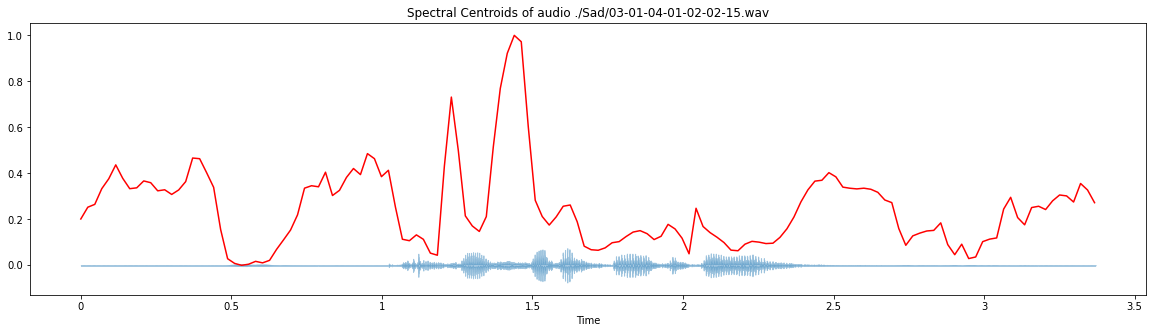

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Pass y=[ 8.6909458e-05  1.1727664e-04  1.1829916e-04 ... -5.4093937e-07
  4.6204173e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  """


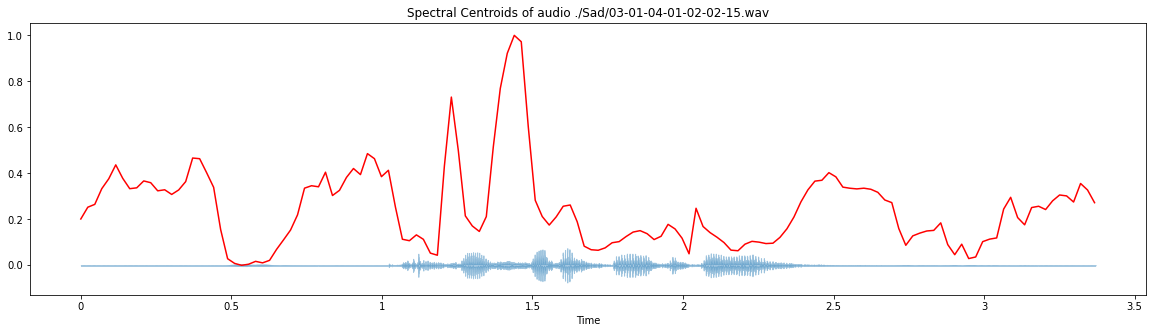

In [22]:
for file in Sad:
    Spectral_centroid(file)

## Spectral Roll off

In [23]:
def Spectral_rolloff(file):
    x, sr = librosa.load(file)
    plt.figure(figsize=(20, 5))
    plt.title('Spectral Rolloff of audio {}'.format(file))
    spectral_rolloff = librosa.feature.spectral_rolloff(x, sr=sr, roll_percent=0.01)[0]
    frames = range(len(spectral_rolloff))
    t = librosa.frames_to_time(frames)
    librosa.display.waveshow(x, sr=sr, alpha=0.4)
    plt.plot(t, normalize(spectral_rolloff), color='r')
    plt.show()


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Pass y=[-9.5055666e-06 -3.0879924e-05 -6.5940058e-06 ...  1.4301932e-05
  2.0139956e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  """


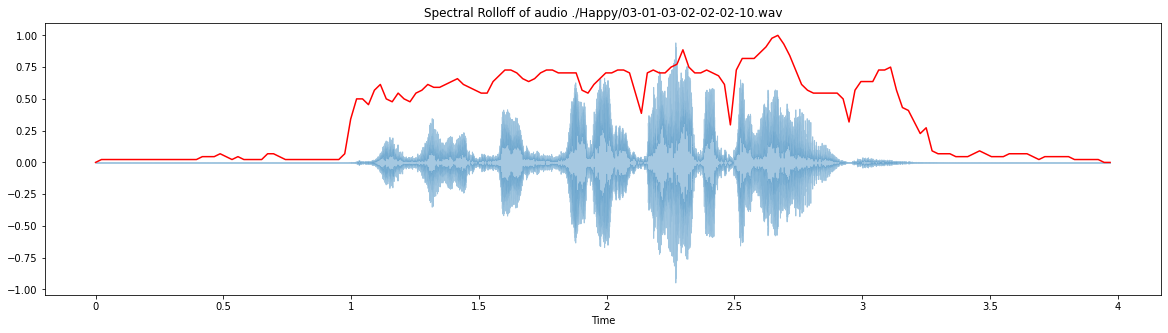

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  """


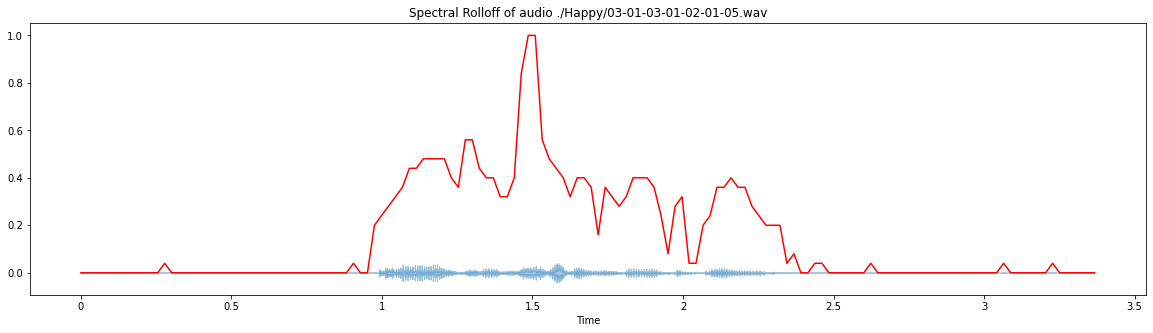

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Pass y=[-1.3235668e-06  2.2518198e-06 -1.0626446e-05 ... -2.5542351e-05
 -1.3824980e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  """


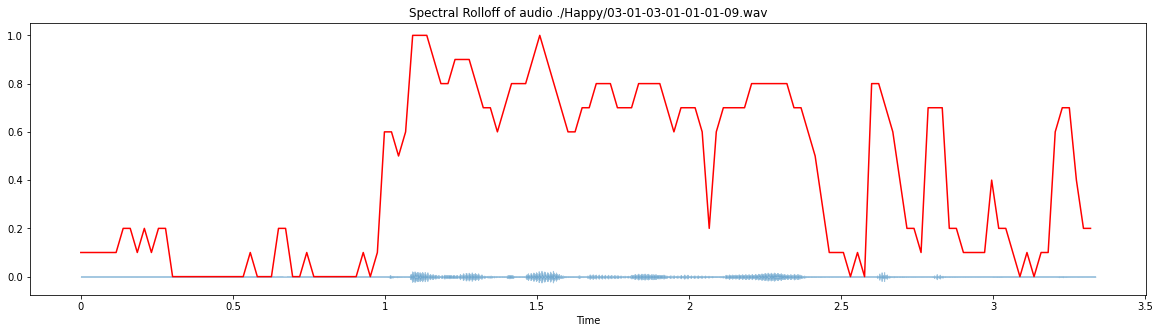

In [24]:
for file in Happy:
    Spectral_rolloff(file)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.0808695e-07
  3.4365976e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  """


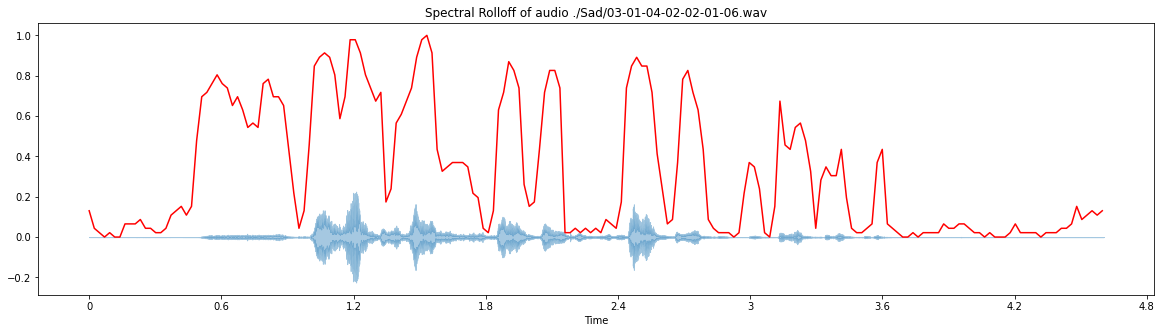

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Pass y=[ 8.6909458e-05  1.1727664e-04  1.1829916e-04 ... -5.4093937e-07
  4.6204173e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  """


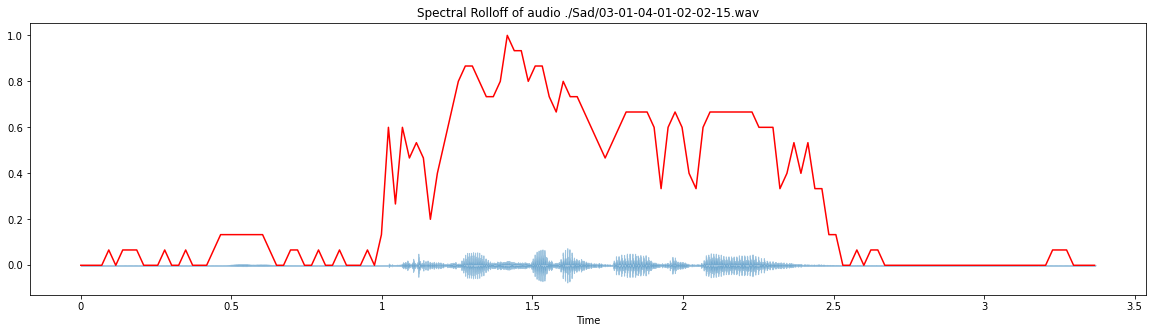

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Pass y=[ 8.6909458e-05  1.1727664e-04  1.1829916e-04 ... -5.4093937e-07
  4.6204173e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  """


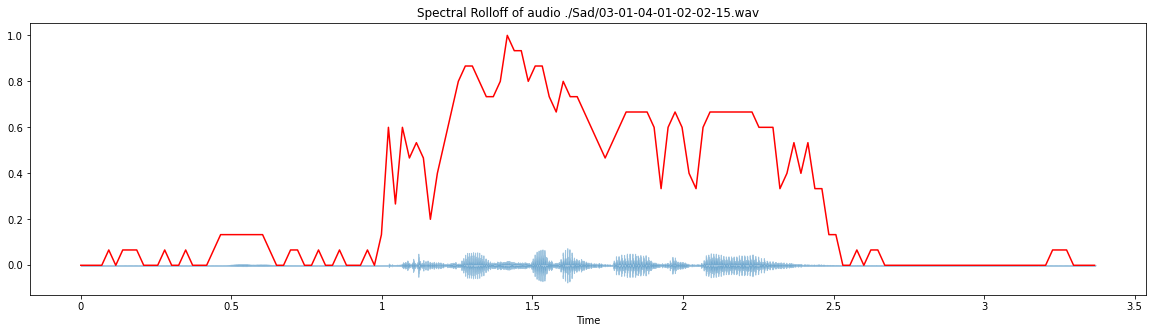

In [25]:
for file in Sad:
    Spectral_rolloff(file)

## MFCC

In [26]:
def mfcc(file):
    x,  sr = librosa.load(file)
    plt.figure(figsize=(20, 6))
    plt.title('MFCC Spectral of audio {}'.format(file))
    mfccs = librosa.feature.mfcc(y=x, sr=sr)
    librosa.display.specshow(mfccs, sr=sr, x_axis='time')
    plt.show()

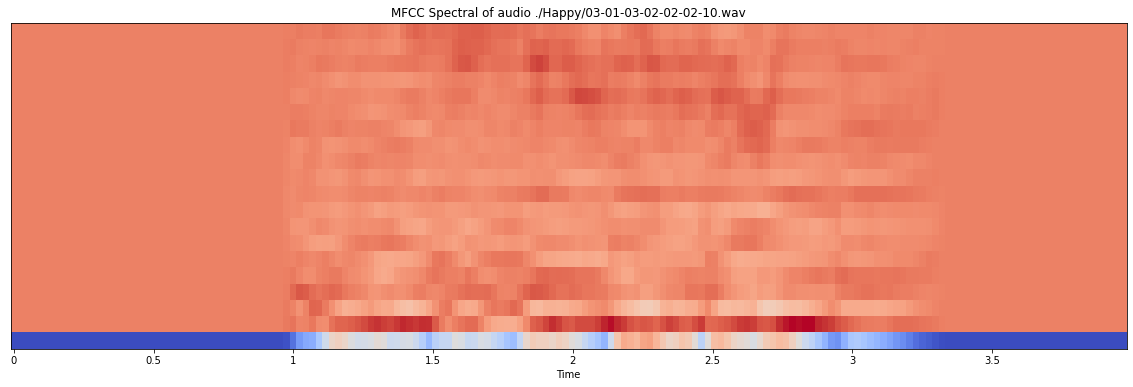

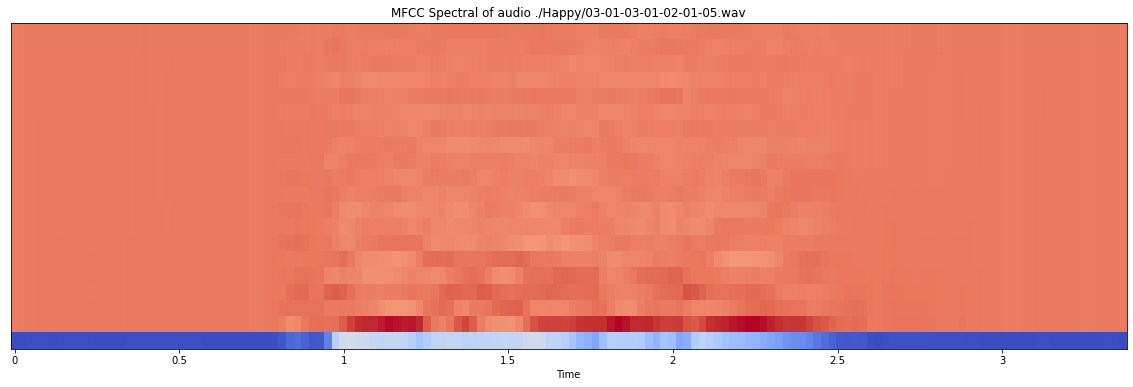

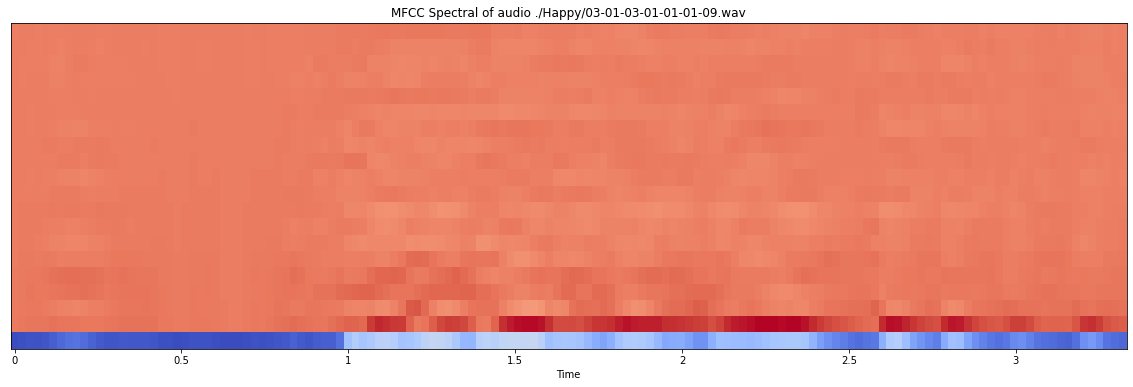

In [27]:
for file in Happy:
    mfcc(file)

The voice has a high pitch in center

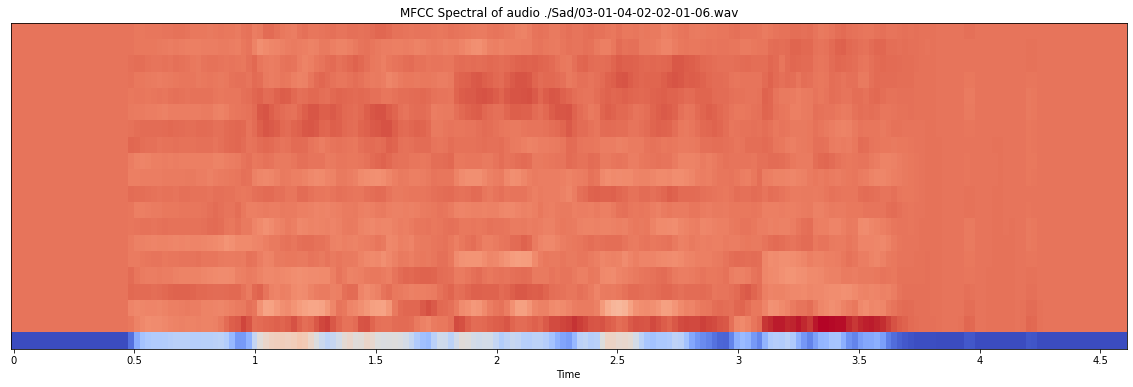

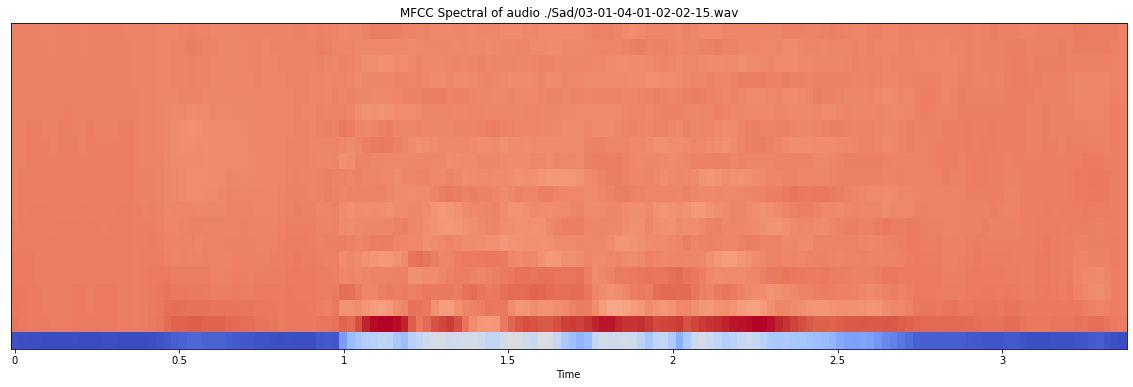

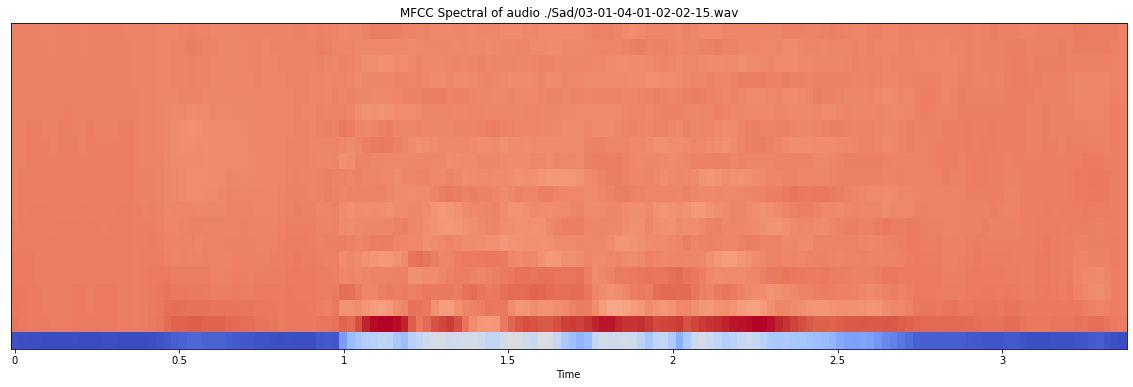

In [28]:
for file in Sad:
    mfcc(file)

The voice has a high pitch in center

## Mel Spectogram

In [29]:
def mel_Spectogram(file):
    x,  sr = librosa.load(file)
    plt.figure(figsize=(20, 6))
    plt.title('Mel Spectrogram of audio {}'.format(file))
    mel_spec = librosa.feature.melspectrogram(y=x, sr=sr)
    librosa.display.specshow(mel_spec, sr=sr, x_axis='time')
    plt.show()


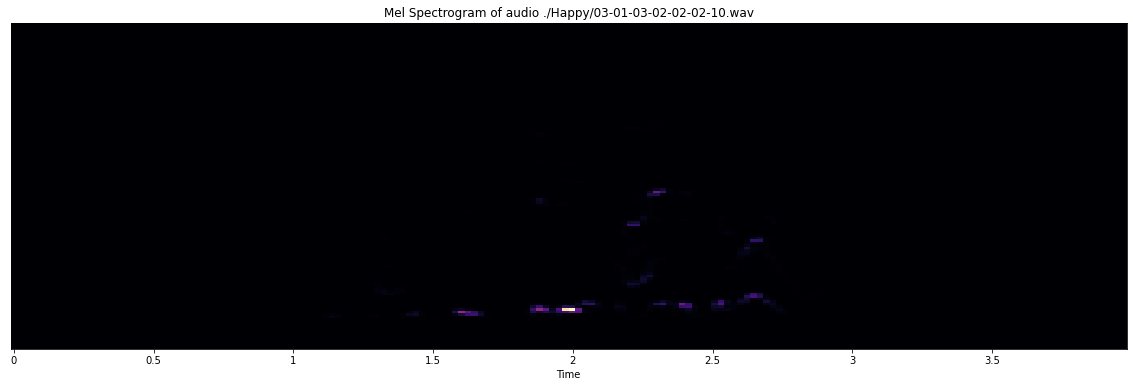

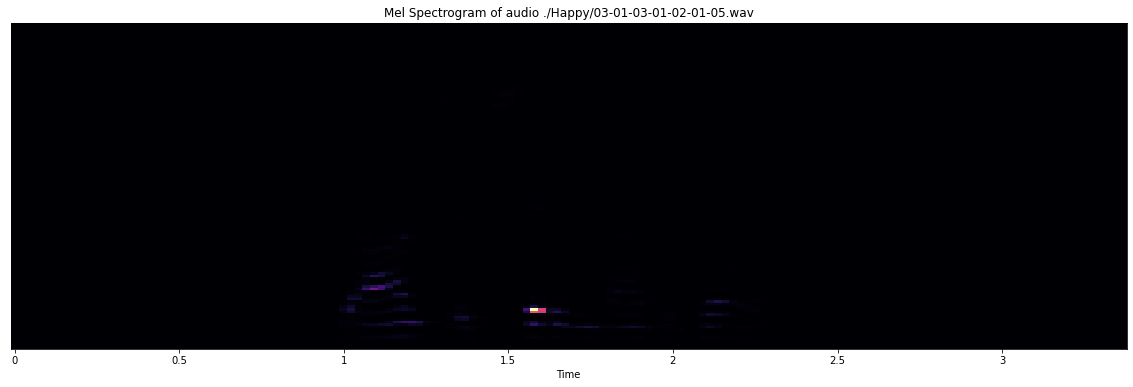

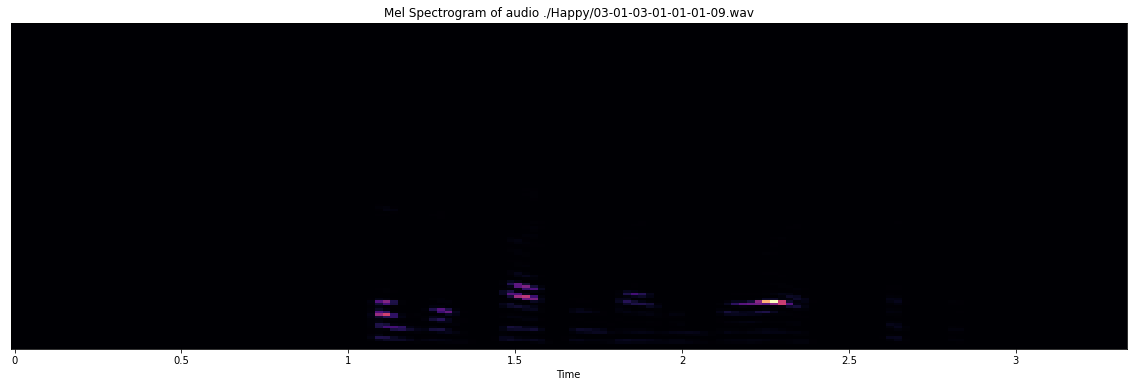

In [30]:
for file in Happy:
    mel_Spectogram(file)

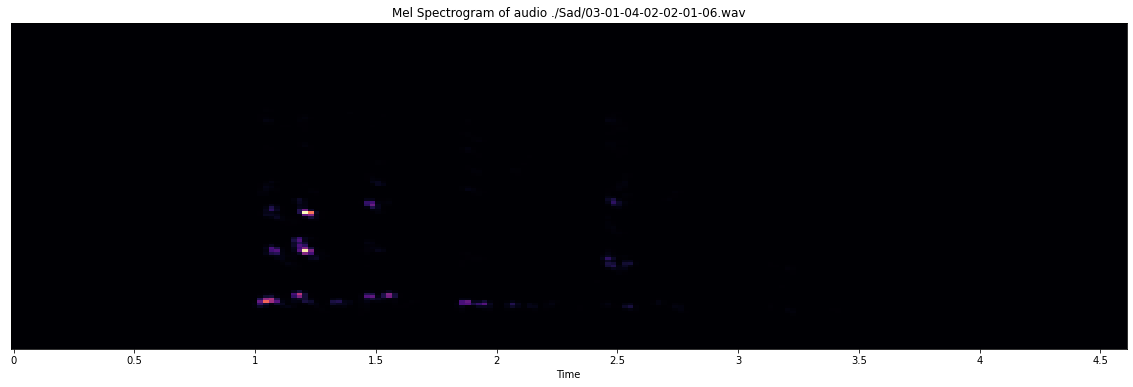

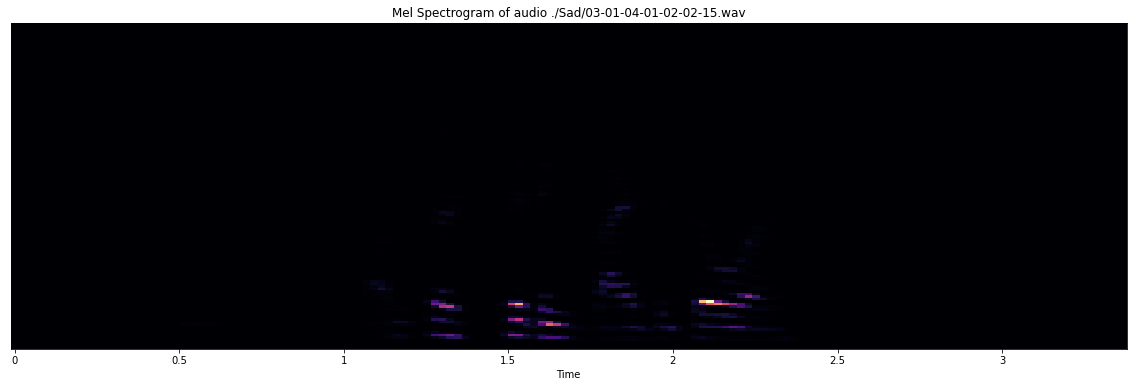

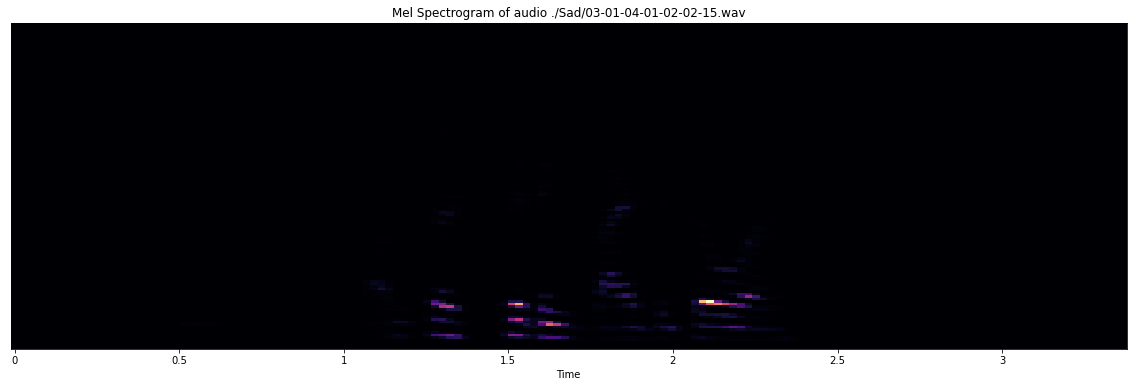

In [31]:
for file in Sad:
    mel_Spectogram(file)

# Task 2
Extract the MFCC features with 40 components from those 500 audios and build simple
logistic regression. Comment on the model output performance. (Try to adjust MFCC
components).

##### Extracting features from Happy files

In [62]:
i = 0
l_happy = []
for dirname, _, filenames in os.walk('./'):
    print(dirname)
    if dirname == "./Happy":
        for filename in filenames:
            if filename.endswith(".wav"):
                a = os.path.join(dirname, filename)
                x, sr = librosa.load(a)
                mfccs = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=40)
                mean = np.mean((mfccs).T,axis = 0)
                l_happy.append(mean)
                i = i+1
                if i == 250:
                    break
        

./
./Sad
./.virtual_documents
./Happy


##### Extracting features from sad files

In [63]:
i = 0
l_sad = []
for dirname, _, filenames in os.walk('./'):
    print(dirname)
    if dirname == "./Sad":
        for filename in filenames:
            if filename.endswith(".wav"):
                a = os.path.join(dirname, filename)
                x, sr = librosa.load(a)
                mfccs = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=40)
                mean = np.mean((mfccs).T,axis = 0)
                l_sad.append(mean)
                i = i+1
                if i == 250:
                    break

./
./Sad
./.virtual_documents
./Happy


In [64]:
import pandas as pd

In [65]:
happy_mfcc = pd.DataFrame(l_happy,columns=range(1,41))
happy_mfcc["Class"] = "Happy"

sad_mfcc = pd.DataFrame(l_sad,columns=range(1,41))
sad_mfcc["Class"] = "Sad"

In [66]:
mfcc_data = happy_mfcc.append(sad_mfcc)

In [67]:
mfcc_data.to_csv("Mfcc_Logistic.csv",index=False)

#### Model Building

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score

In [69]:
def Logistic_Regression(X,y):
    ## Train test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,
                                                        stratify = y)
    
    ## scaling
    scaler = StandardScaler()
    X_train_scale = scaler.fit_transform(X_train)
    X_test_scale = scaler.transform(X_test)
    
    ## Model Building
    lr = LogisticRegression()
    lr.fit(X_train_scale,y_train)
    
    ## prediction
    y_train_pred = lr.predict(X_train_scale)
    y_test_pred = lr.predict(X_test_scale)
    
    ## Accuracy and Confusion Matrix
    ## training
    print("training accuracy = ",accuracy_score(y_train,y_train_pred)*100)
    ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,normalize="all")
    plt.show()

    print("testing accuracy = ",accuracy_score(y_test,y_test_pred)*100)
    ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred,normalize="all")
    plt.show()

    

#### assigning X and y

In [70]:
mfcc_data["Class"] = mfcc_data["Class"].replace({"Happy": 1,"Sad": 0})
X = mfcc_data.iloc[:,0:40]
y = mfcc_data["Class"]

training accuracy =  85.01628664495115


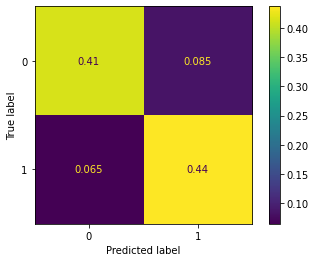

testing accuracy =  76.62337662337663


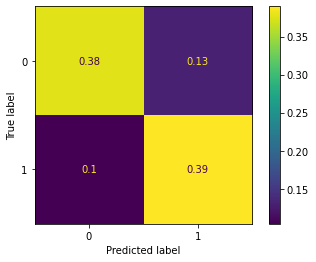

In [71]:
Logistic_Regression(X,y)

# Task 3
Extract the mel spectrogram features with 128 mel bands from those 500 audios and build
simple logistic regression. Comment on the model output performance.


##### Extracting features from Happy file

In [72]:
i = 0
mel_happy = []
for dirname, _, filenames in os.walk('./'):
    print(dirname)
    if dirname == "./Happy":
        for filename in filenames:
            if filename.endswith(".wav"):
                a = os.path.join(dirname, filename)
                x, sr = librosa.load(a)
        
                mel = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128)
                mean = np.mean((mel).T,axis = 0)
                mel_happy.append(mean)
                i = i+1
                if i == 250:
                    break


./
./Sad
./.virtual_documents
./Happy


##### Extracting features from Sad file

In [73]:
i = 0
mel_sad = []
for dirname, _, filenames in os.walk('./'):
    print(dirname)
    if dirname == "./Sad":
        for filename in filenames:
            if filename.endswith(".wav"):
                a = os.path.join(dirname, filename)
                x, sr = librosa.load(a)
        
                mel = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128)
                mean = np.mean((mel).T,axis = 0)
                mel_sad.append(mean)
                i = i+1
                if i == 250:
                    break

./
./Sad
./.virtual_documents
./Happy


In [74]:
happy_mel = pd.DataFrame(mel_happy,columns=range(1,129))
happy_mel["Class"] = "Happy"

sad_mel = pd.DataFrame(mel_sad,columns=range(1,129))
sad_mel["Class"] = "Sad"

In [75]:
mel_data = happy_mel.append(sad_mel)

In [76]:
mel_data

,1,2,3,4,5,6,7,8,9,10,...,120,121,122,123,124,125,126,127,128,Class
0,1.948976e-04,0.000115,0.000047,0.000028,0.000056,0.000164,0.000679,0.002588,0.002292,0.004869,...,7.014236e-04,9.606851e-04,0.000683,0.000529,0.000905,5.294938e-04,1.549476e-04,1.167724e-05,1.278832e-07,Happy
1,5.498244e-05,0.000105,0.000741,0.004269,0.012008,0.004632,0.000989,0.006121,0.029863,0.034259,...,3.851773e-05,4.175099e-05,0.000049,0.000051,0.000039,2.201938e-05,5.808095e-06,5.080263e-07,5.440122e-09,Happy
2,1.734615e-02,0.000175,0.001061,0.001303,0.000973,0.005640,0.035128,0.113925,0.190558,0.255569,...,3.202329e-04,2.997353e-04,0.000453,0.000370,0.000258,1.491274e-04,2.760147e-05,1.985286e-06,5.141789e-08,Happy
3,9.720217e-01,0.094396,0.008326,0.003689,0.045081,0.242368,0.608706,1.007425,1.888653,1.430412,...,4.856169e-04,5.542035e-04,0.000690,0.000804,0.000500,3.706723e-04,1.171756e-04,9.501961e-06,1.391103e-07,Happy
4,2.242402e-03,0.000073,0.000011,0.000011,0.000031,0.003699,0.011171,0.102940,0.297684,1.196082,...,2.551200e-04,2.678497e-04,0.000321,0.000575,0.001143,1.230722e-03,5.685429e-04,4.060534e-05,7.289203e-07,Happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,1.215917e-05,0.000021,0.000042,0.000061,0.022918,0.122176,0.088953,0.011173,0.000823,0.002101,...,3.801515e-04,5.144865e-04,0.000218,0.000307,0.000355,4.236070e-04,1.712875e-04,1.893064e-05,4.233142e-07,Sad
188,4.168681e-05,0.000057,0.000037,0.000036,0.000050,0.000851,0.093313,0.281447,0.174680,0.067279,...,3.958490e-05,4.146140e-05,0.000037,0.000032,0.000026,3.221728e-05,1.031078e-05,7.089577e-07,1.406146e-08,Sad
189,3.910775e-06,0.000048,0.002288,0.002706,0.000158,0.000913,0.002420,0.002776,0.000732,0.000375,...,5.255226e-07,6.551873e-07,0.000001,0.000003,0.000004,4.379916e-06,1.419074e-06,1.528368e-07,1.981352e-09,Sad
190,8.870995e-05,0.000047,0.000007,0.000005,0.000023,0.001293,0.016532,0.024679,0.013522,0.002374,...,1.973073e-06,5.806155e-06,0.000013,0.000017,0.000006,3.422170e-06,1.645936e-06,1.282994e-07,5.767783e-09,Sad


In [77]:
mel_data.to_csv("Mel_Logistic.csv",index=False)

#### Assigning X and y

In [78]:
mel_data["Class"] = mel_data["Class"].replace({"Happy": 1,"Sad": 0})
X = mel_data.iloc[:,:-1]
y = mel_data.iloc[:,-1:]

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


training accuracy =  79.80456026058633


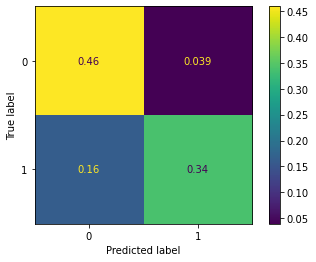

testing accuracy =  64.93506493506493


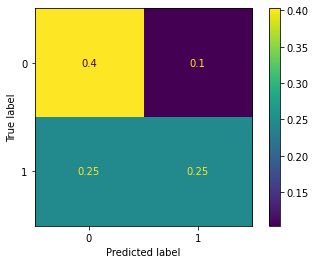

In [79]:
Logistic_Regression(X,y)

**Inference : We see that Mfcc features give an accuracy of 76.62% with 9% overfitting and Mel features give an accuracy of 64.93% with around 15% overfitting.**
- Hence we can say that mfcc act as better feature for classifying happy and sad audio files as compared to mel Spectogram as overfitting is less and accuracy is better than mel spectogram